In [6]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Kết nối với Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Đường dẫn đến tệp tin CSV trong Google Drive
file_path = 'https://drive.google.com/uc?id=1OQYLAEJhQN1Rg0tKTz5qZDDDEn9o3Rza' 


In [4]:
# Đọc tệp tin dữ liệu và lưu vào DataFrame
df = pd.read_csv(file_path)



In [7]:
# Xóa các cột không cần thiết
data = df.drop(columns=["Date", "Time"])

In [17]:
#Xoá các hàng có giá tị thiếu
data = df.dropna()
# Xoá các cột không cần thiết và cột nhãn 
data = data.drop(['Date',"Time"], axis=1)



In [18]:
data.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [19]:
data = data[['CO(GT)' ,'PT08.S1(CO)' ]]

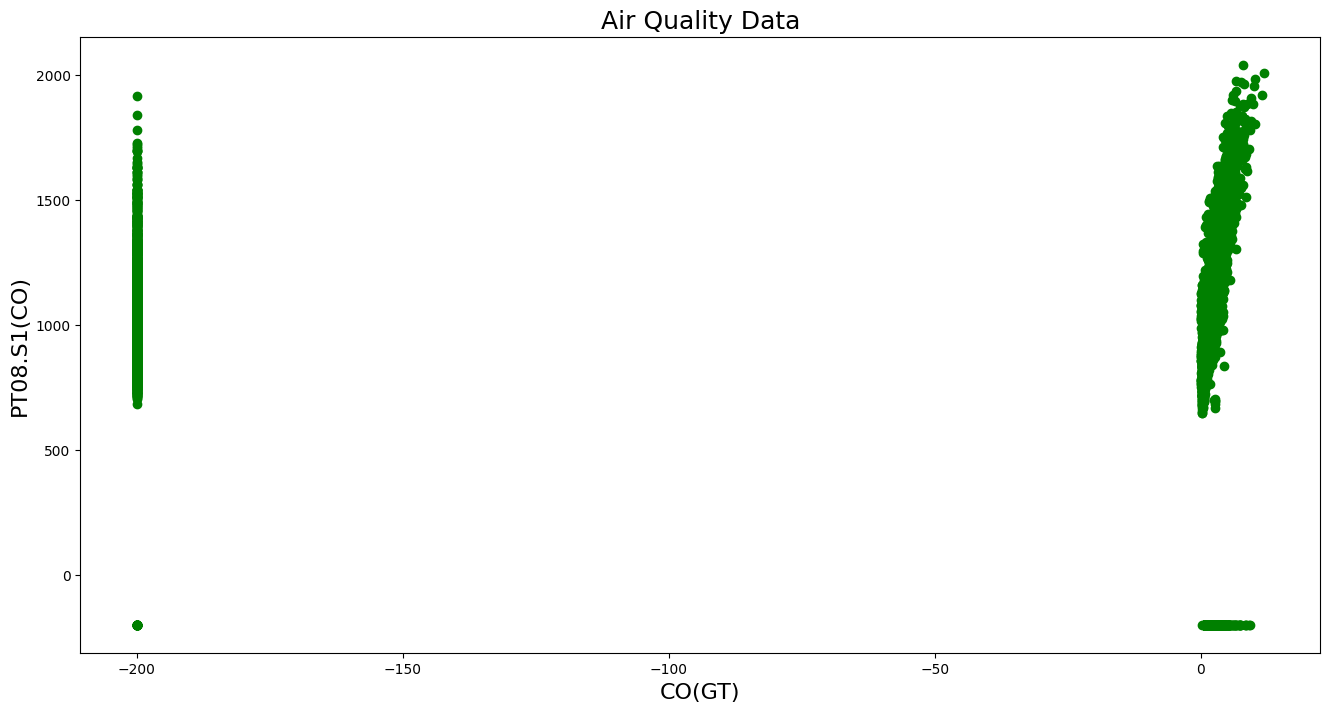

In [22]:
x = data['CO(GT)'].values
y = data['PT08.S1(CO)'].values

# Vẽ biểu đồ scatter plot
plt.figure(figsize=(16, 8))
plt.scatter(x, y, color='green')
plt.xlabel('CO(GT)', fontsize=16)
plt.ylabel('PT08.S1(CO)', fontsize=16)
plt.title("Air Quality Data", fontsize=18)

plt.show()

*Giá trị mặc định của n_init trong thuật toán K-Means clustering sẽ thay đổi từ 10 thành 'auto' trong phiên bản scikit-learn 1.4. Để tránh cảnh báo này, bạn có thể đặt giá trị n_init *
Bằng cách đặt giá trị n_init thành 10 trong khi khởi tạo đối tượng KMeans, bạn sẽ loại bỏ cảnh báo FutureWarning.

[1 3 1 ... 3 0 3]


#Plot All K-Means Clusters

In [28]:

kMeans = KMeans(n_clusters=5, random_state=0, n_init=10)
kMeans.fit(data)
labels = kMeans.predict(data)

print(labels)

[1 3 1 ... 3 0 3]


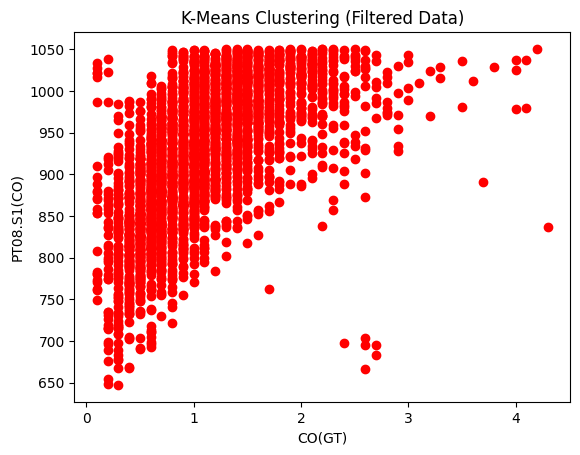

In [36]:
# Lọc dữ liệu cho nhãn cụm mong muốn (ví dụ: nhãn cụm 0)
filtered_data = data[labels == 0]

# Vẽ biểu đồ scatter plot cho dữ liệu đã lọc
plt.scatter(filtered_data['CO(GT)'], filtered_data['PT08.S1(CO)'], c='red')
plt.xlabel('CO(GT)')
plt.ylabel('PT08.S1(CO)')
plt.title('K-Means Clustering (Filtered Data)')
plt.show()

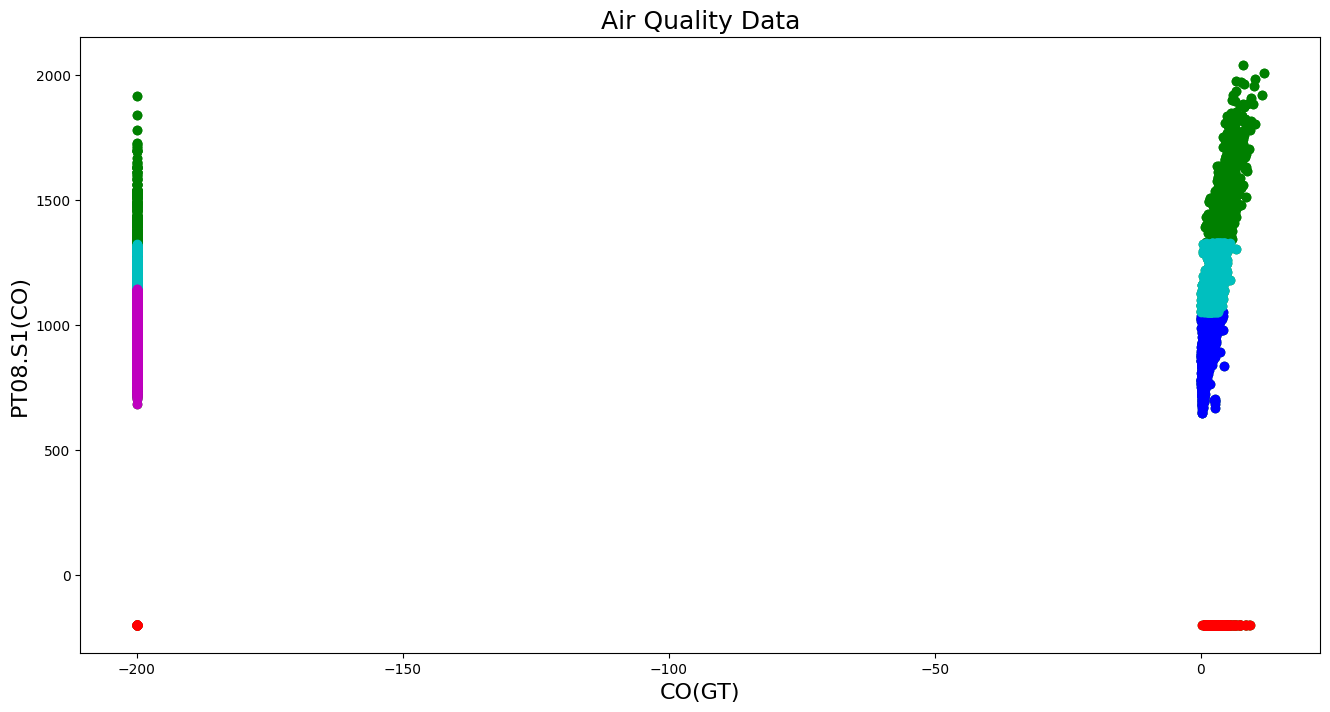

In [39]:
# Vẽ tất cả các cụm K-Means
# Nhận nhãn độc đáo
plt.figure(figsize=(16, 8))
plt.scatter(x, y, color='green')
plt.xlabel('CO(GT)', fontsize=16)  # Đặt nhãn cho trục x
plt.ylabel('PT08.S1(CO)', fontsize=16)  # Đặt nhãn cho trục y
plt.title("Air Quality Data", fontsize=18)  # Đặt tiêu đề biểu đồ

u_labels = np.unique(labels)
plt_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']  # Danh sách các màu hỗ trợ

# Vẽ sơ đồ kết quả:
for i in u_labels:
    filtered_label = data[labels == i]
    plt.scatter(filtered_label['CO(GT)'], filtered_label['PT08.S1(CO)'], color=plt_colors[i])

plt.show()
